<a href="https://colab.research.google.com/github/abhikbhattacharjee/Bayesian_Modelling_Dissertation/blob/main/Half_Moons_Data/Empirical_Comparison/EmpericalPriorComp_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepbayes

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
import deepbayes
import deepbayes.optimizers as optimizers
import numpy as np
from deepbayes import PosteriorModel
import seaborn as sns

from matplotlib import font_manager
font_path = '/content/NewCM10-Regular.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [ ]:
def my_predict(model, input, n=35):
    if(model.det):
        return model.model(input)
    out = []
    for i in range(n):
        model.model.set_weights(model.sample())
        out.append(model.model(input).numpy())
    return np.mean(out,axis=0), np.var(out,axis=0)

<Axes: >

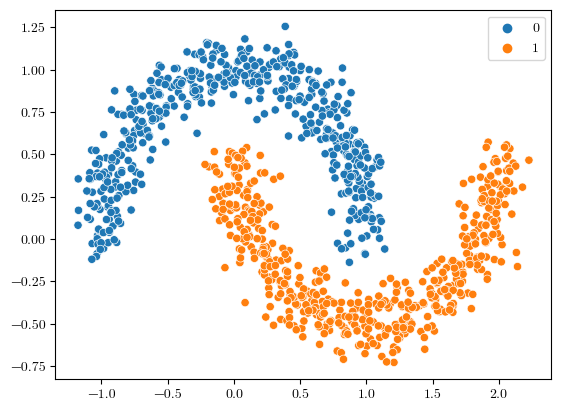

In [ ]:
n_samples = 1000
noise = 0.1
x, y = datasets.make_moons(n_samples = n_samples, noise = noise)

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x, y)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_model.predict(x)

acc_scr = accuracy_score(y, y_pred)

print("Accuracy Score: ", acc_scr)

cnf_matrix = metrics.confusion_matrix(y, y_pred)
print("Confusion Matrix: \n", cnf_matrix)

Accuracy Score:  1.0
Confusion Matrix: 
 [[500   0]
 [  0 500]]


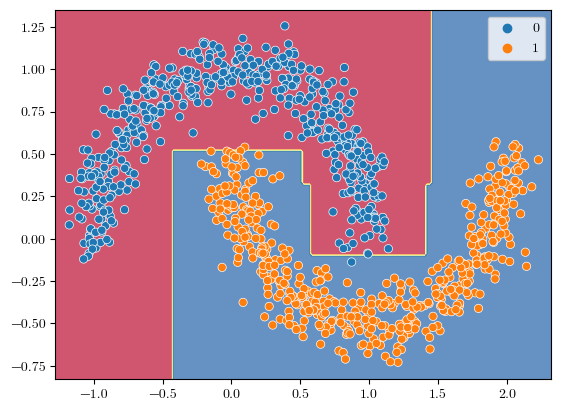

In [ ]:
h = 0.02
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')
plt.show()

<Axes: >

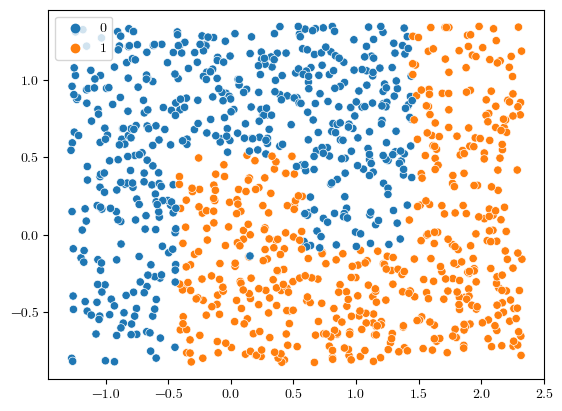

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
num_samples = 1000

x_samples = np.random.uniform(x_min, x_max, num_samples)
y_samples = np.random.uniform(y_min, y_max, num_samples)

samples = np.column_stack((x_samples, y_samples))

knn_target = tree_model.predict(samples)

sns.scatterplot(x=samples[:, 0], y=samples[:, 1], hue=knn_target, palette='tab10')

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(samples, knn_target, test_size = 0.25, random_state=42)
y_train_new = y_train_new.astype("int64").reshape(-1,1)
y_test_new = y_test_new.astype("int64").reshape(-1,1)

In [ ]:
model_new = Sequential()
model_new.add(Dense(10, input_dim = 2, activation = 'relu'))
model_new.add(Dense(2, activation = 'softmax'))

loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = optimizers.BayesByBackprop()
learning_rate = 0.6

bayes_model_dt_prior = opt.compile(model_new, loss_fn = loss, epochs = 20, learning_rate = learning_rate, kl_weight = 0.1)

This optimizer does not have a default compilation method. Please make sure to call the correct .compile method before use.
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
deepbayes: Using passed loss_fn as the data likelihood in the KL loss


In [ ]:
 bayes_model_dt_prior.train(X_train_new, y_train_new, X_test_new, y_test_new)

100%|██████████| 12/12 [00:01<00:00,  7.86it/s]


Epoch 1, loss: 0.951, acc: 0.592, val_loss: 1.026, val_acc: 0.612


100%|██████████| 12/12 [00:02<00:00,  5.48it/s]


Epoch 2, loss: 1.087, acc: 0.528, val_loss: 0.738, val_acc: 0.396


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Epoch 3, loss: 0.780, acc: 0.641, val_loss: 0.822, val_acc: 0.512


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 4, loss: 0.791, acc: 0.652, val_loss: 0.603, val_acc: 0.704


100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


Epoch 5, loss: 0.689, acc: 0.743, val_loss: 0.368, val_acc: 0.820


100%|██████████| 12/12 [00:05<00:00,  2.34it/s]


Epoch 6, loss: 0.796, acc: 0.697, val_loss: 0.539, val_acc: 0.796


100%|██████████| 12/12 [00:04<00:00,  2.94it/s]


Epoch 7, loss: 0.767, acc: 0.744, val_loss: 0.318, val_acc: 0.844


100%|██████████| 12/12 [00:05<00:00,  2.34it/s]


Epoch 8, loss: 0.600, acc: 0.776, val_loss: 0.328, val_acc: 0.840


100%|██████████| 12/12 [00:02<00:00,  4.79it/s]


Epoch 9, loss: 0.679, acc: 0.779, val_loss: 0.450, val_acc: 0.776


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 10, loss: 0.630, acc: 0.801, val_loss: 0.396, val_acc: 0.828


100%|██████████| 12/12 [00:02<00:00,  4.70it/s]


Epoch 11, loss: 0.697, acc: 0.755, val_loss: 0.314, val_acc: 0.840


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 12, loss: 0.670, acc: 0.772, val_loss: 0.360, val_acc: 0.808


100%|██████████| 12/12 [00:01<00:00, 10.52it/s]


Epoch 13, loss: 0.659, acc: 0.771, val_loss: 0.347, val_acc: 0.840


100%|██████████| 12/12 [00:01<00:00, 10.56it/s]


Epoch 14, loss: 0.618, acc: 0.773, val_loss: 0.608, val_acc: 0.776


100%|██████████| 12/12 [00:01<00:00, 10.50it/s]


Epoch 15, loss: 0.645, acc: 0.783, val_loss: 0.347, val_acc: 0.860


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 16, loss: 0.635, acc: 0.751, val_loss: 0.560, val_acc: 0.648


100%|██████████| 12/12 [00:02<00:00,  4.72it/s]


Epoch 17, loss: 0.627, acc: 0.793, val_loss: 0.322, val_acc: 0.860


100%|██████████| 12/12 [00:01<00:00, 10.75it/s]


Epoch 18, loss: 0.591, acc: 0.795, val_loss: 0.314, val_acc: 0.852


100%|██████████| 12/12 [00:01<00:00, 10.83it/s]


Epoch 19, loss: 0.695, acc: 0.747, val_loss: 0.482, val_acc: 0.696


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 20, loss: 0.608, acc: 0.795, val_loss: 0.351, val_acc: 0.836


In [ ]:
prediction_mean,prediction_variance = my_predict(bayes_model_dt_prior,X_train_new)
print("Prediction Mean: ", prediction_mean)
print("Prediction Variance: ", prediction_variance)

Prediction Mean:  [[0.10165668 0.8983434 ]
 [0.9132381  0.08676182]
 [0.96019244 0.03980745]
 ...
 [0.98771036 0.01228959]
 [0.9265872  0.07341287]
 [0.05404337 0.94595665]]
Prediction Variance:  [[0.01618223 0.01618223]
 [0.0097785  0.00977849]
 [0.00355944 0.00355944]
 ...
 [0.00054492 0.00054492]
 [0.00774881 0.00774881]
 [0.00835188 0.00835188]]


In [ ]:
bayes_model_dt_prior.save("PosteriorModels/model")
del bayes_model_dt_prior

/usr/local/lib/python3.10/dist-packages/deepbayes/optimizers/bayesbybackprop.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(path+"/mean", np.asarray(self.posterior_mean))
/usr/local/lib/python3.10/dist-packages/deepbayes/optimizers/bayesbybackprop.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(path+"/var", np.asarray(var))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

y_train = y_train.astype("float32").reshape(-1,1)
y_test = y_test.astype("float32").reshape(-1,1)

In [ ]:
retrain_model = PosteriorModel("PosteriorModels/model")

bayes_model = opt.compile(model_new, loss_fn=loss, learning_rate = 0.8, epochs=50)
bayes_model.posterior_mean = retrain_model.posterior_mean.tolist()
bayes_model.posterior_var = retrain_model.posterior_var.tolist()
bayes_model.train(X_train, y_train, X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
BayesKeras detected the above model 
 None
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
deepbayes: Using passed loss_fn as the data likelihood in the KL loss


100%|██████████| 13/13 [00:01<00:00, 10.44it/s]


Epoch 1, loss: 2.371, acc: 0.639, val_loss: 0.752, val_acc: 0.590


100%|██████████| 13/13 [00:01<00:00, 10.51it/s]


Epoch 2, loss: 2.583, acc: 0.673, val_loss: 0.869, val_acc: 0.680


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 3, loss: 2.599, acc: 0.679, val_loss: 0.613, val_acc: 0.755


100%|██████████| 13/13 [00:01<00:00, 10.67it/s]


Epoch 4, loss: 2.238, acc: 0.664, val_loss: 1.316, val_acc: 0.465


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 5, loss: 2.104, acc: 0.652, val_loss: 2.127, val_acc: 0.465


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 6, loss: 2.477, acc: 0.627, val_loss: 0.373, val_acc: 0.785


100%|██████████| 13/13 [00:01<00:00, 10.63it/s]


Epoch 7, loss: 3.400, acc: 0.585, val_loss: 0.438, val_acc: 0.780


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 8, loss: 2.100, acc: 0.700, val_loss: 0.481, val_acc: 0.810


100%|██████████| 13/13 [00:01<00:00, 10.27it/s]


Epoch 9, loss: 2.179, acc: 0.582, val_loss: 0.540, val_acc: 0.765


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 10, loss: 2.222, acc: 0.636, val_loss: 2.238, val_acc: 0.340


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 11, loss: 2.512, acc: 0.637, val_loss: 1.925, val_acc: 0.465


100%|██████████| 13/13 [00:01<00:00, 10.89it/s]


Epoch 12, loss: 2.264, acc: 0.655, val_loss: 1.424, val_acc: 0.410


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 13, loss: 2.966, acc: 0.591, val_loss: 1.994, val_acc: 0.765


100%|██████████| 13/13 [00:01<00:00, 10.32it/s]


Epoch 14, loss: 1.891, acc: 0.700, val_loss: 0.479, val_acc: 0.785


100%|██████████| 13/13 [00:01<00:00, 10.32it/s]


Epoch 15, loss: 1.792, acc: 0.654, val_loss: 0.809, val_acc: 0.660


100%|██████████| 13/13 [00:01<00:00, 10.25it/s]


Epoch 16, loss: 1.961, acc: 0.601, val_loss: 1.327, val_acc: 0.205


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 17, loss: 2.238, acc: 0.616, val_loss: 0.805, val_acc: 0.540


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 18, loss: 2.145, acc: 0.611, val_loss: 0.398, val_acc: 0.800


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 19, loss: 2.513, acc: 0.587, val_loss: 3.974, val_acc: 0.465


100%|██████████| 13/13 [00:01<00:00,  9.20it/s]


Epoch 20, loss: 3.102, acc: 0.601, val_loss: 2.071, val_acc: 0.465


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 21, loss: 2.161, acc: 0.710, val_loss: 1.314, val_acc: 0.465


100%|██████████| 13/13 [00:01<00:00, 10.78it/s]


Epoch 22, loss: 1.859, acc: 0.730, val_loss: 0.797, val_acc: 0.740


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 23, loss: 2.576, acc: 0.661, val_loss: 0.995, val_acc: 0.375


100%|██████████| 13/13 [00:01<00:00, 10.27it/s]


Epoch 24, loss: 2.582, acc: 0.601, val_loss: 0.706, val_acc: 0.795


100%|██████████| 13/13 [00:01<00:00, 10.65it/s]


Epoch 25, loss: 2.614, acc: 0.686, val_loss: 0.527, val_acc: 0.800


100%|██████████| 13/13 [00:01<00:00, 10.83it/s]


Epoch 26, loss: 2.281, acc: 0.710, val_loss: 2.803, val_acc: 0.535


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 27, loss: 2.294, acc: 0.624, val_loss: 2.052, val_acc: 0.465


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 28, loss: 2.392, acc: 0.681, val_loss: 1.703, val_acc: 0.535


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 29, loss: 3.383, acc: 0.570, val_loss: 0.882, val_acc: 0.535


100%|██████████| 13/13 [00:01<00:00, 10.38it/s]


Epoch 30, loss: 2.451, acc: 0.764, val_loss: 0.442, val_acc: 0.830


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 31, loss: 2.683, acc: 0.625, val_loss: 0.706, val_acc: 0.575


100%|██████████| 13/13 [00:01<00:00, 10.27it/s]


Epoch 32, loss: 2.009, acc: 0.623, val_loss: 0.769, val_acc: 0.520


100%|██████████| 13/13 [00:01<00:00, 10.64it/s]


Epoch 33, loss: 2.464, acc: 0.571, val_loss: 0.448, val_acc: 0.810


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 34, loss: 2.425, acc: 0.669, val_loss: 0.340, val_acc: 0.800


100%|██████████| 13/13 [00:01<00:00, 10.48it/s]


Epoch 35, loss: 2.692, acc: 0.610, val_loss: 1.345, val_acc: 0.610


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 36, loss: 2.328, acc: 0.663, val_loss: 0.774, val_acc: 0.790


100%|██████████| 13/13 [00:01<00:00,  7.94it/s]


Epoch 37, loss: 1.842, acc: 0.635, val_loss: 0.438, val_acc: 0.830


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 38, loss: 1.925, acc: 0.640, val_loss: 0.353, val_acc: 0.800


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 39, loss: 2.113, acc: 0.666, val_loss: 0.741, val_acc: 0.840


100%|██████████| 13/13 [00:01<00:00, 10.68it/s]


Epoch 40, loss: 1.821, acc: 0.709, val_loss: 0.606, val_acc: 0.765


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 41, loss: 2.571, acc: 0.621, val_loss: 1.466, val_acc: 0.740


100%|██████████| 13/13 [00:01<00:00, 10.74it/s]


Epoch 42, loss: 2.800, acc: 0.664, val_loss: 0.427, val_acc: 0.810


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 43, loss: 2.741, acc: 0.639, val_loss: 0.626, val_acc: 0.660


100%|██████████| 13/13 [00:01<00:00, 10.82it/s]


Epoch 44, loss: 1.899, acc: 0.642, val_loss: 0.576, val_acc: 0.765


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 45, loss: 2.362, acc: 0.656, val_loss: 0.474, val_acc: 0.800


100%|██████████| 13/13 [00:01<00:00, 10.81it/s]


Epoch 46, loss: 1.897, acc: 0.592, val_loss: 1.708, val_acc: 0.660


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 47, loss: 1.870, acc: 0.738, val_loss: 0.617, val_acc: 0.740


100%|██████████| 13/13 [00:01<00:00, 10.69it/s]


Epoch 48, loss: 2.994, acc: 0.618, val_loss: 0.205, val_acc: 0.900


100%|██████████| 13/13 [00:01<00:00, 10.16it/s]


Epoch 49, loss: 2.255, acc: 0.719, val_loss: 0.675, val_acc: 0.590


100%|██████████| 13/13 [00:02<00:00,  5.09it/s]

Epoch 50, loss: 2.301, acc: 0.654, val_loss: 1.275, val_acc: 0.740


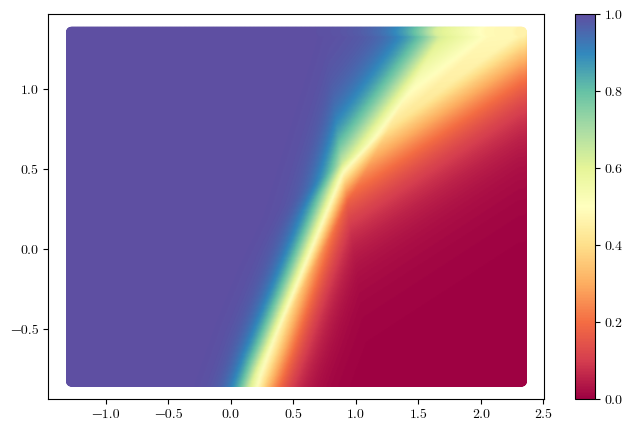

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
num_points = 1000

x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x, y)
samples = np.column_stack((X.flatten(), Y.flatten()))

test2 = bayes_model.predict(samples)
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=test2[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
plt.colorbar(scatter)

In [ ]:
prediction_mean,prediction_variance = my_predict(bayes_model,samples)
print("Prediction Mean: ", prediction_mean)
print("Prediction Variance: ", prediction_variance)

Prediction Mean:  [[0.51609    0.48391005]
 [0.51529497 0.48470503]
 [0.5145035  0.48549646]
 ...
 [0.51239955 0.4876004 ]
 [0.5121808  0.48781914]
 [0.5119618  0.48803815]]
Prediction Variance:  [[0.1692809  0.16928092]
 [0.16927174 0.16927172]
 [0.16926038 0.16926038]
 ...
 [0.18605144 0.18605146]
 [0.18605913 0.18605912]
 [0.18606669 0.18606669]]


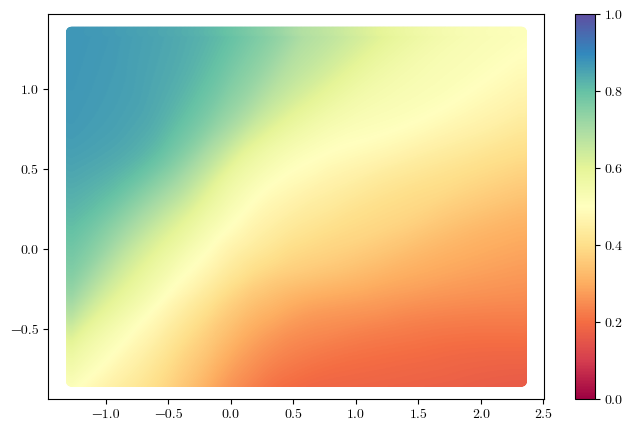

In [ ]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=prediction_mean[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
plt.colorbar(scatter)

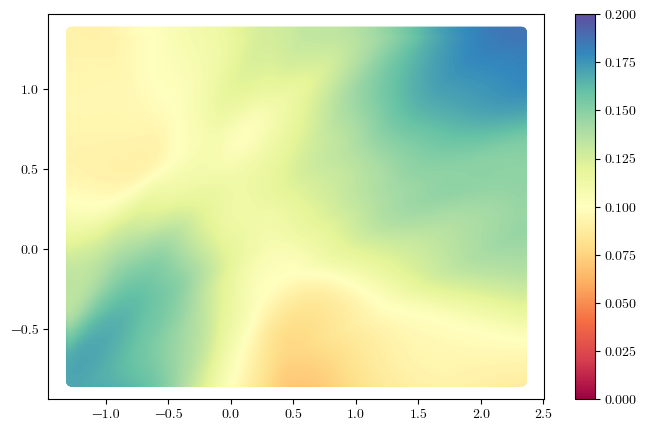

In [ ]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=prediction_variance[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 0.2)
plt.colorbar(scatter)

In [ ]:
test3 = bayes_model.predict(X_test)
test3 = tf.where(test3[:, 0] > test3[:, 1], 0, 1)
test3 = tf.expand_dims(test3, axis=1)
print("Accuracy Score: ", accuracy_score(y_test, test3))

Accuracy Score:  0.79
